In [75]:
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import trange

In [76]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [77]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


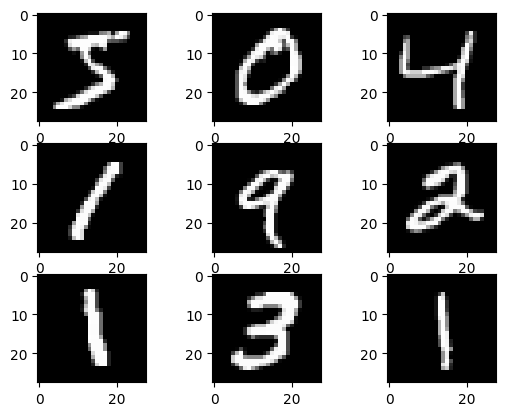

In [78]:
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [79]:
train_X = train_X.reshape(-1, 28*28)
test_X = test_X.reshape(-1, 28*28)

In [84]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.lin1 = nn.Linear(784, 128)
    self.lin2 = nn.Linear(128, 10)
  def forward(self, x):
    x = F.relu(self.lin1(x))
    return self.lin2(x)

In [85]:
model = Net()

loss 0.11855093389749527, accuracy 0.9375: 100%|██████████| 1000/1000 [00:06<00:00, 148.31it/s]


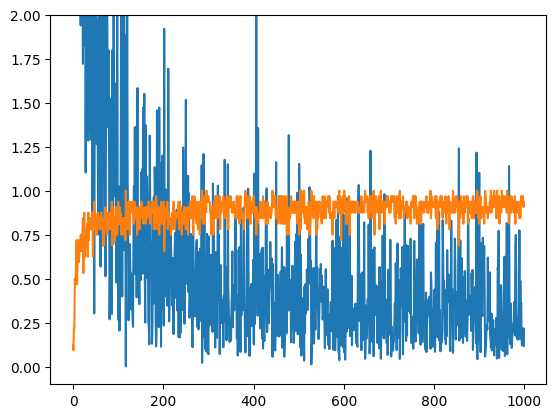

In [86]:
from matplotlib import pyplot

batch = 32
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())
loss_arr, acc_arr =[], []
for i in (t := trange(1000)):
  sample = np.random.randint(0, train_X.shape[0], size = (batch))

  X = torch.tensor(train_X[sample].reshape(-1, 784)).float()
  Y = torch.tensor(train_y[sample]).long()

  optim.zero_grad()

  out = model(X)

  ind = torch.argmax(out, dim = 1)
  accuracy = (ind == Y).float().mean()

  loss = loss_fn(out, Y)
  loss.backward()

  optim.step()

  loss, accuracy = loss.item(), accuracy.item()
  loss_arr.append(loss)
  acc_arr.append(accuracy)

  t.set_description("loss {}, accuracy {}".format(loss, accuracy))
pyplot.ylim(-0.1, 2)
pyplot.plot(loss_arr)
pyplot.plot(acc_arr)

In [91]:
y_preds = torch.argmax(model(torch.tensor(test_X).float()), dim=1).numpy()
(y_preds == test_y).mean()

0.9163